In [1]:
#working space setup, reading in the data and preparing the libaries that will be used later, data frame is converted into data table

setwd('C:/Users/r4ndomw4lk/Desktop/Zadanie Pearson/EA_audition_for_sharing')
df=read.csv('EA_Audition_Data.csv')
library(data.table)
library(ggplot2)
df=data.table(df)

In [2]:
#data summary

summary(df)

   learner_id         country      in_course      unit         avg_score     
 Min.   :     39   TR     :52757   f: 6100   1      :11435   Min.   :0.0000  
 1st Qu.:1044868   ES     : 8409   t:75332   2      : 9273   1st Qu.:0.7170  
 Median :1092952   PL     : 5925             3      : 8163   Median :0.8400  
 Mean   :1137210   CO     : 5537             4      : 7136   Mean   :0.7921  
 3rd Qu.:1244376   IT     : 1779             5      : 6448   3rd Qu.:0.9300  
 Max.   :1390141   OM     :  856             6      : 5916   Max.   :1.0000  
                   (Other): 6169             (Other):33061   NA's   :2       
   completion        inv_rate      
 Min.   :0.0250   Min.   :0.00000  
 1st Qu.:0.7000   1st Qu.:0.00000  
 Median :0.9620   Median :0.00000  
 Mean   :0.8098   Mean   :0.04416  
 3rd Qu.:1.0000   3rd Qu.:0.02300  
 Max.   :1.0000   Max.   :1.00000  
                                   

In [3]:
#data summary countinued

str(df)

Classes 'data.table' and 'data.frame':	81432 obs. of  7 variables:
 $ learner_id: int  39 39 39 41 41 41 41 802 802 802 ...
 $ country   : Factor w/ 87 levels "","AD","AF","AG",..: 62 62 62 62 62 62 62 1 1 1 ...
 $ in_course : Factor w/ 2 levels "f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ unit      : Factor w/ 17 levels "1","10","11",..: 1 6 14 1 6 8 14 1 5 6 ...
 $ avg_score : num  0.2 1 0.1 0.877 0 0 0 0.954 0.877 0.883 ...
 $ completion: num  0.1 0.087 0.273 0.35 0.087 0.087 0.182 1 1 0.739 ...
 $ inv_rate  : num  0 0 0 0.381 0 1 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
#first 6 rows examination

head(df)

,learner_id,country,in_course,unit,avg_score,completion,inv_rate
1,39,PL,t,1,0.2,0.1,0
2,39,PL,t,3,1,0.087,0
3,39,PL,t,REVIEW 2,0.1,0.273,0
4,41,PL,t,1,0.877,0.35,0.381
5,41,PL,t,3,0,0.087,0
6,41,PL,t,5,0,0.087,1


In [5]:
#puts factors for units in the right order

df$unit=factor(df$unit, levels=c("1","2","3","4","5","6","7","8","9","10","11","12","REVIEW 1","REVIEW 2","REVIEW 3","REVIEW 4", "VIDEO PODCASTS"))

In [6]:
#creates new column in_course_mod with more understandable names than in the in_course column 

df[in_course=='t',in_course_mod:='studying with teacher']
df[in_course=='f',in_course_mod:='studying alone']


,learner_id,country,in_course,unit,avg_score,completion,inv_rate,in_course_mod
1,39,PL,t,1,0.2,0.1,0,studying with teacher
2,39,PL,t,3,1,0.087,0,studying with teacher
3,39,PL,t,REVIEW 2,0.1,0.273,0,studying with teacher
4,41,PL,t,1,0.877,0.35,0.381,studying with teacher
5,41,PL,t,3,0,0.087,0,studying with teacher
6,41,PL,t,5,0,0.087,1,studying with teacher
7,41,PL,t,REVIEW 2,0,0.182,0,studying with teacher
8,802,,t,1,0.954,1,0,studying with teacher
9,802,,t,2,0.877,1,0,studying with teacher
10,802,,t,3,0.883,0.739,0,studying with teacher


,learner_id,country,in_course,unit,avg_score,completion,inv_rate,in_course_mod
1,39,PL,t,1,0.2,0.1,0,studying with teacher
2,39,PL,t,3,1,0.087,0,studying with teacher
3,39,PL,t,REVIEW 2,0.1,0.273,0,studying with teacher
4,41,PL,t,1,0.877,0.35,0.381,studying with teacher
5,41,PL,t,3,0,0.087,0,studying with teacher
6,41,PL,t,5,0,0.087,1,studying with teacher
7,41,PL,t,REVIEW 2,0,0.182,0,studying with teacher
8,802,,t,1,0.954,1,0,studying with teacher
9,802,,t,2,0.877,1,0,studying with teacher
10,802,,t,3,0.883,0.739,0,studying with teacher


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."

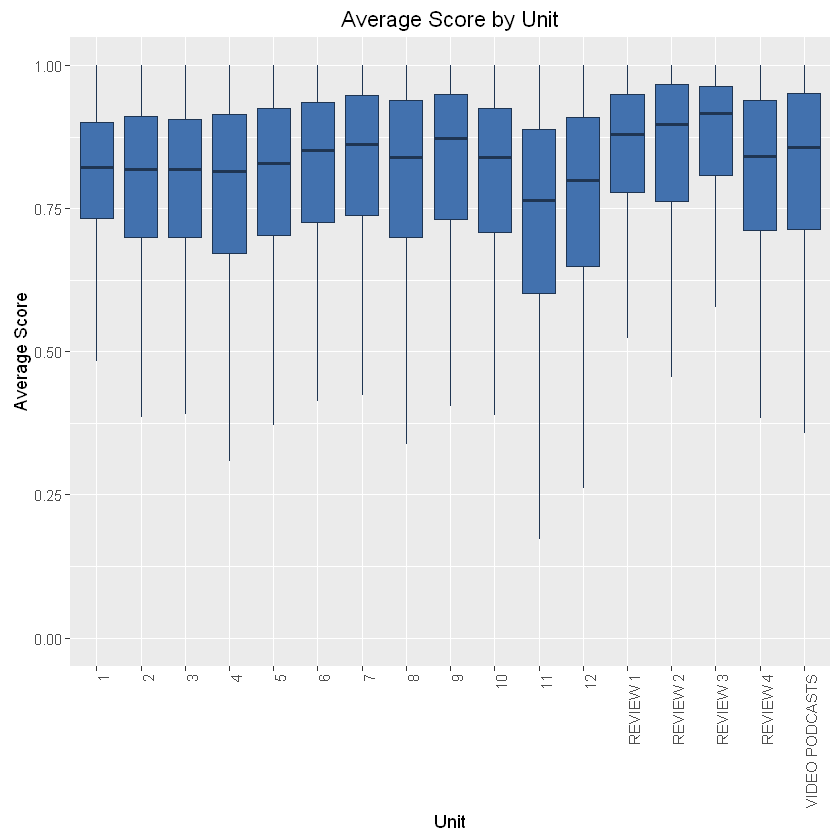

In [132]:
#average score by unit plot, median scores for unit 11 and 12 seems to be lower than for the rest of the units

ggplot(df,aes(x=unit,y=avg_score))+geom_boxplot(fill="#4271AE",colour="#1F3552",outlier.shape = NA)+
scale_y_continuous(name = "Average Score")+scale_x_discrete(name = "Unit")+ ggtitle("Average Score by Unit")+theme(axis.text.x=element_text(angle=90, hjust=1))

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."

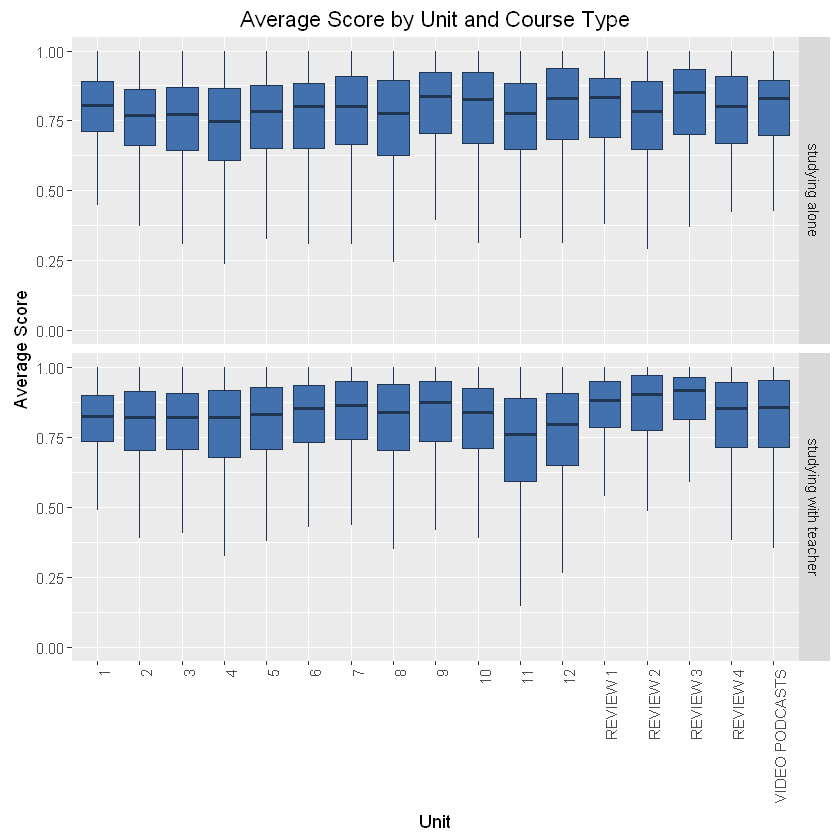

In [151]:
#average score by unit and course type, a teacher seems to have only little impact on the average scores

ggplot(df,aes(x=unit,y=avg_score))+geom_boxplot(fill="#4271AE",colour="#1F3552",outlier.shape = NA)+facet_grid(in_course_mod~.)+scale_y_continuous(name = "Average Score")+scale_x_discrete(name = "Unit")+ ggtitle("Average Score by Unit and Course Type")+theme(axis.text.x=element_text(angle=90, hjust=1))

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_summary)."

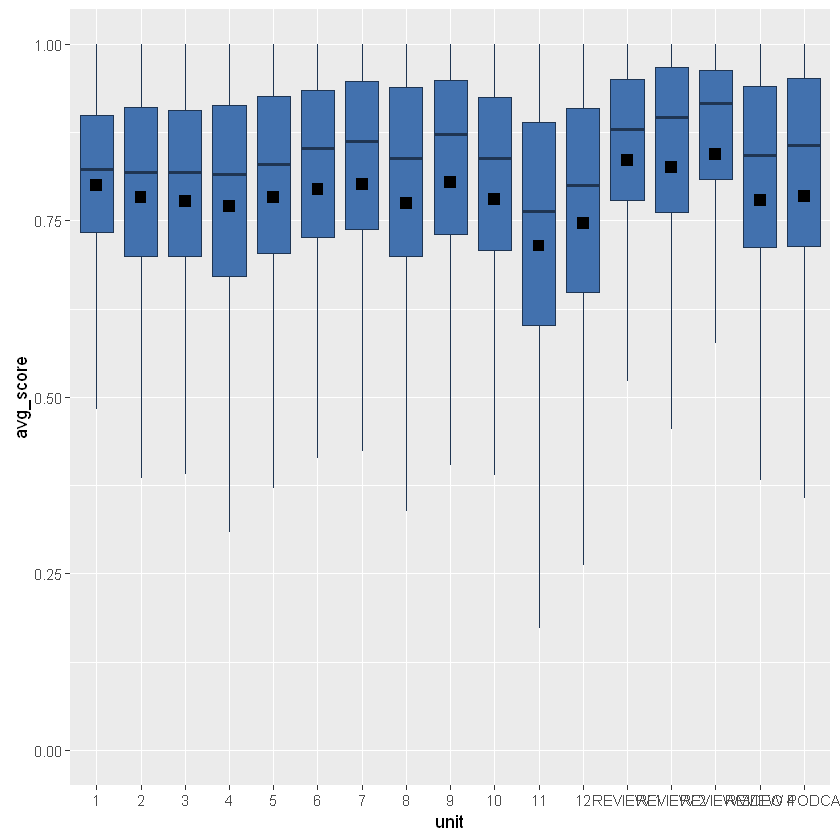

In [70]:
#checking if means bring additional insight, they tend to exhibit similar trend as median

means=df[,.(calc_mean=mean(avg_score, na.rm=TRUE)),by=unit]
ggplot(df,aes(x=unit,y=avg_score))+geom_boxplot(fill="#4271AE",colour="#1F3552",outlier.shape = NA)+stat_summary(fun.y=mean, colour="black", geom="point", shape=15, size=3, show_guide=FALSE)

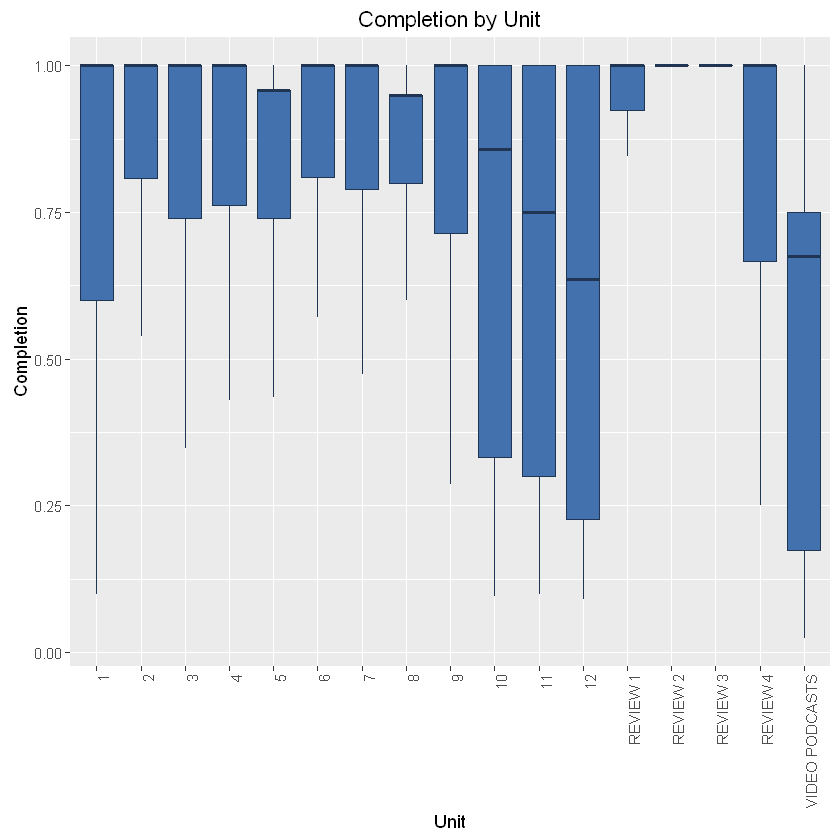

In [134]:
#median completion by unit plot, there seems to be significantly lower median completion rates for chapters 10-12

ggplot(df,aes(x=unit,y=completion))+geom_boxplot(fill="#4271AE",colour="#1F3552",outlier.shape = NA)+
scale_y_continuous(name = "Completion")+scale_x_discrete(name = "Unit")+ ggtitle("Completion by Unit")+theme(axis.text.x=element_text(angle=90, hjust=1))

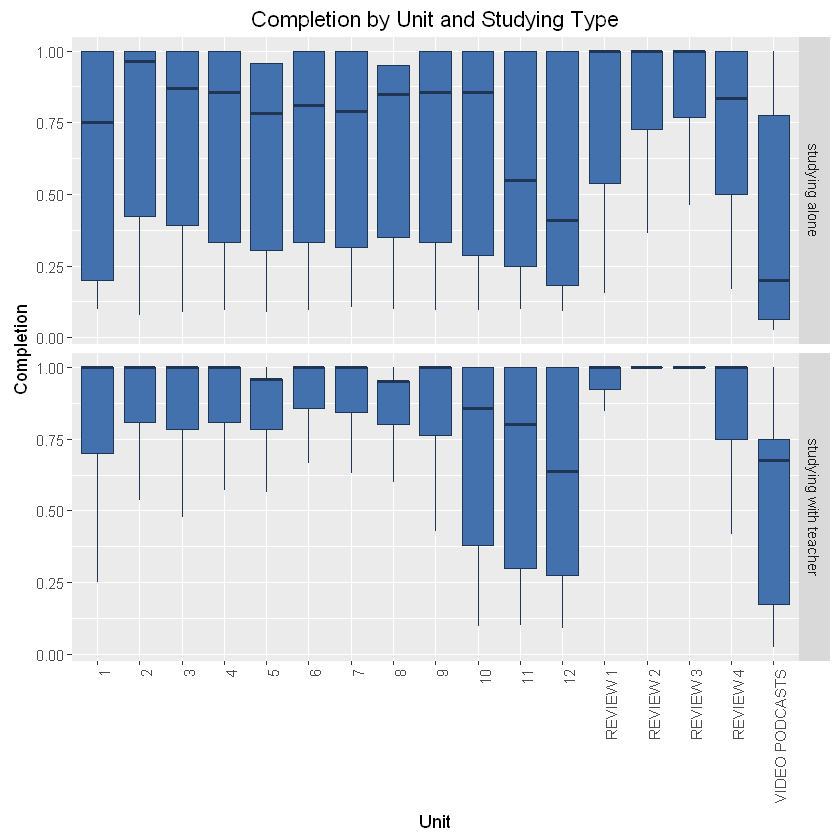

In [152]:
#median completion by unit and studying type plot, presence of the teacher seems to have a significant positive impact on a completion rates

ggplot(df,aes(x=unit,y=completion))+geom_boxplot(fill="#4271AE",colour="#1F3552",outlier.shape = NA)+facet_grid(in_course_mod~.)+
scale_y_continuous(name = "Completion")+scale_x_discrete(name = "Unit")+ ggtitle("Completion by Unit and Studying Type")+theme(axis.text.x=element_text(angle=90, hjust=1))

Warning message:
"Removed 10326 rows containing non-finite values (stat_boxplot)."

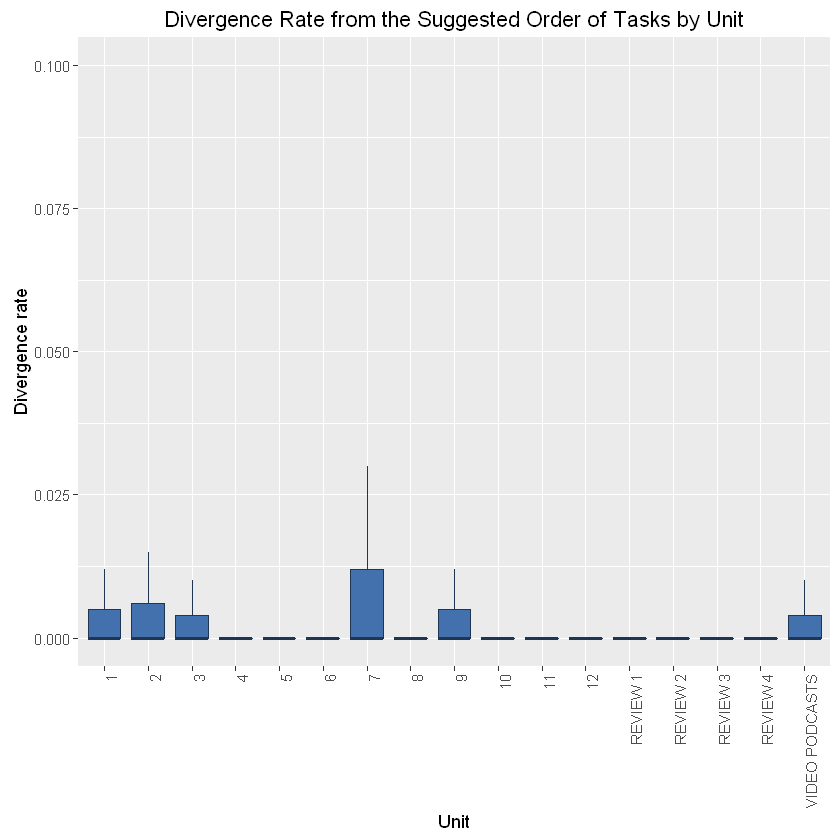

In [149]:
#divergence rate by unit plot, students seems to be diverging very little from the suggested order of excercises

ggplot(df,aes(x=unit,y=inv_rate))+geom_boxplot(fill="#4271AE",colour="#1F3552",outlier.shape = NA)+scale_y_continuous(name = "Divergence rate", limits=c(0,0.1))+scale_x_discrete(name = "Unit")+ ggtitle("Divergence Rate from the Suggested Order of Tasks by Unit")+theme(axis.text.x=element_text(angle=90, hjust=1))

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."

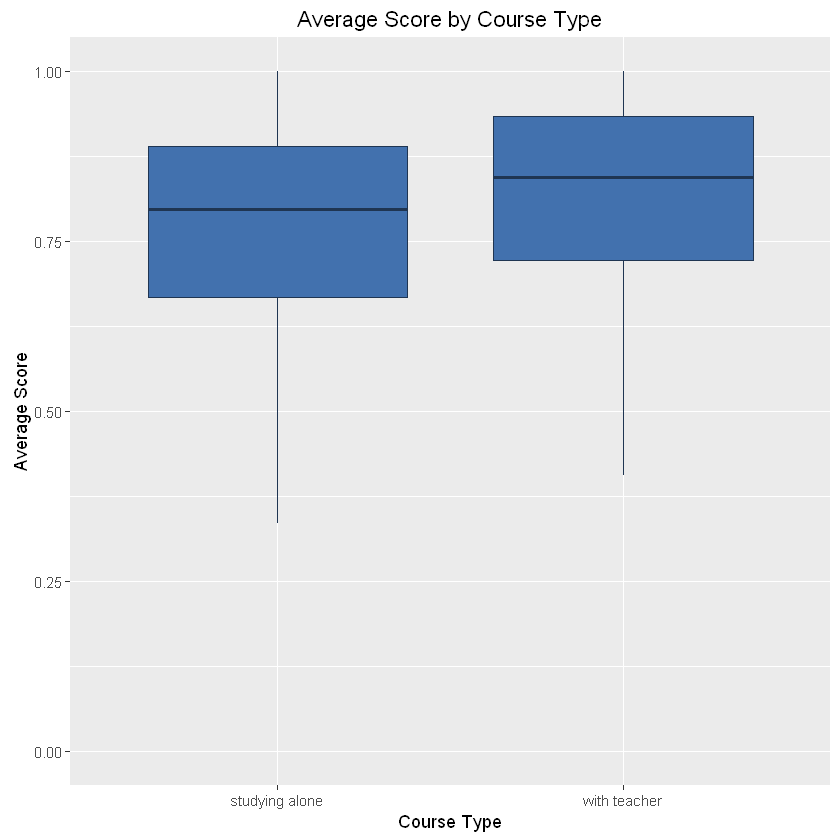

In [13]:
#total average score by course type, students with a teacher achieve slightly higher scores

ggplot(df,aes(x=in_course_mod,y=avg_score))+geom_boxplot(fill="#4271AE",colour="#1F3552",outlier.shape = NA)+
scale_y_continuous(name = "Average Score")+scale_x_discrete(name = "Course Type")+ ggtitle("Average Score by Course Type")

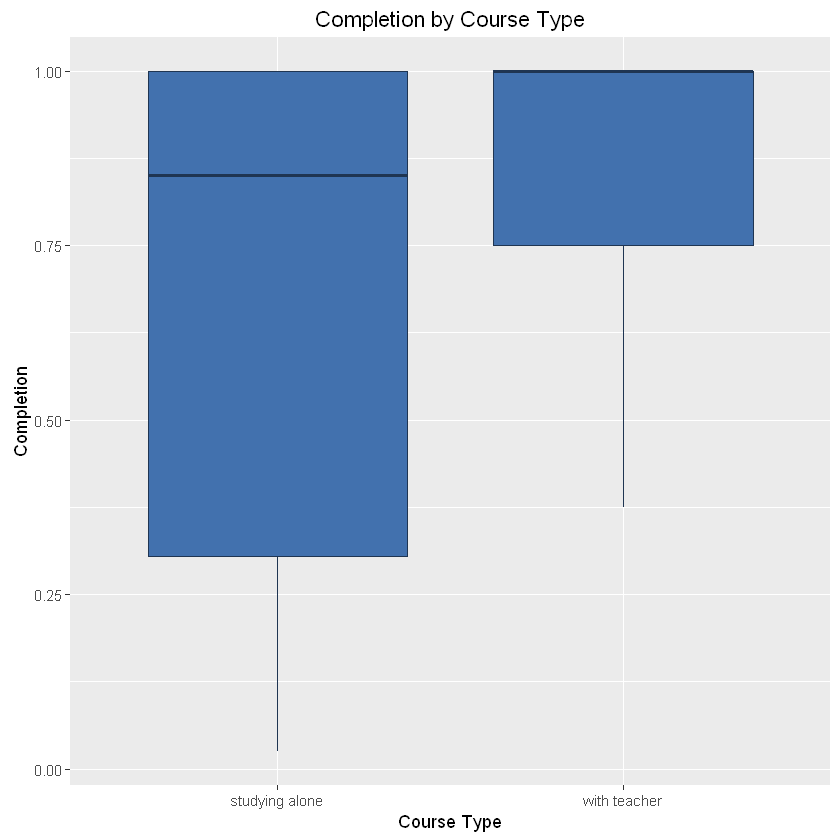

In [136]:
#total median completion by course type, there are significantly higher completion rates for students with a teacher

ggplot(df,aes(x=in_course_mod,y=completion))+geom_boxplot(fill="#4271AE",colour="#1F3552",outlier.shape = NA)+
scale_y_continuous(name = "Completion")+scale_x_discrete(name = "Course Type")+ ggtitle("Completion by Course Type")

Warning message:
"Removed 2 rows containing missing values (geom_point)."

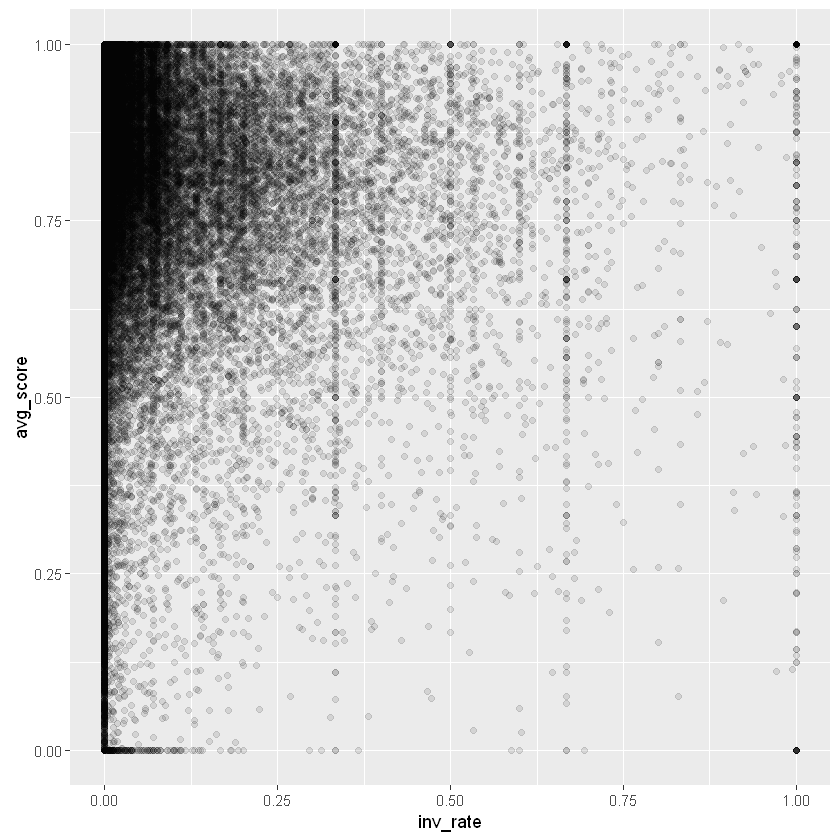

In [15]:
#average score vs inv rate, there is no clear relationship between these two variables

ggplot(df,aes(x=inv_rate,y=avg_score))+geom_point(alpha=0.1)

In [47]:
#there is only slight negative correlation between inv rate and average score

df_cleaned=df[complete.cases(df)]
cor(df_cleaned$avg_score, df_cleaned$inv_rate)

[1] -0.06172509

In [51]:
#inv_rate is statisticaly significant, but the R2 is too small justify the model

lmInvRate=lm(avg_score~inv_rate,df_cleaned)
summary(lmInvRate)


Call:
lm(formula = avg_score ~ inv_rate, data = df_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79666 -0.07366  0.04734  0.13734  0.30578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7966608  0.0007206 1105.52   <2e-16 ***
inv_rate    -0.1024428  0.0058050  -17.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1922 on 81428 degrees of freedom
Multiple R-squared:  0.00381,	Adjusted R-squared:  0.003798 
F-statistic: 311.4 on 1 and 81428 DF,  p-value: < 2.2e-16


In [56]:
#by extending the previous model with in_course higher but still very small R2 is achieved, dead end probably

lmTotal=lm(avg_score~inv_rate+in_course,df_cleaned)
summary(lmTotal)


Call:
lm(formula = avg_score ~ inv_rate + in_course, data = df_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79960 -0.07295  0.04740  0.13657  0.34186 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.759954   0.002473  307.36   <2e-16 ***
inv_rate    -0.101811   0.005797  -17.56   <2e-16 ***
in_courset   0.039648   0.002555   15.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1919 on 81427 degrees of freedom
Multiple R-squared:  0.006747,	Adjusted R-squared:  0.006723 
F-statistic: 276.6 on 2 and 81427 DF,  p-value: < 2.2e-16


In [64]:
#median completion by in_course check

df[,median(completion),by=in_course]

,in_course,V1
1,t,1
2,f,0.85


In [68]:
#mean average score by in_course

df[,mean(avg_score, na.rm=TRUE),by=in_course]

,in_course,V1
1,t,0.79512969256093
2,f,0.755166775992129


In [85]:
df[,.(mean=mean(avg_score, na.rm=TRUE), sd=sd(avg_score, na.rm=TRUE))]

,mean,sd
1,0.7921370,0.1925519


In [77]:
#top10 poorest performing countries on average score

head(df[,.(mean_avg_score=round(mean(avg_score, na.rm=TRUE),2)),by=country][order(mean_avg_score)],10)

,country,mean_avg_score
1,LY,0.55
2,GB,0.56
3,AS,0.56
4,LT,0.59
5,AF,0.59
6,YE,0.59
7,CR,0.6
8,KW,0.61
9,PH,0.62
10,HK,0.65


In [83]:
#top10 best performing countries

head(df[,.(mean_avg_score=round(mean(avg_score, na.rm=TRUE),2)),by=country][order(-mean_avg_score)],10)

,country,mean_avg_score
1,ZW,1
2,BD,1
3,PT,0.97
4,CD,0.94
5,CA,0.94
6,VN,0.89
7,AN,0.89
8,MK,0.88
9,TC,0.88
10,ID,0.88


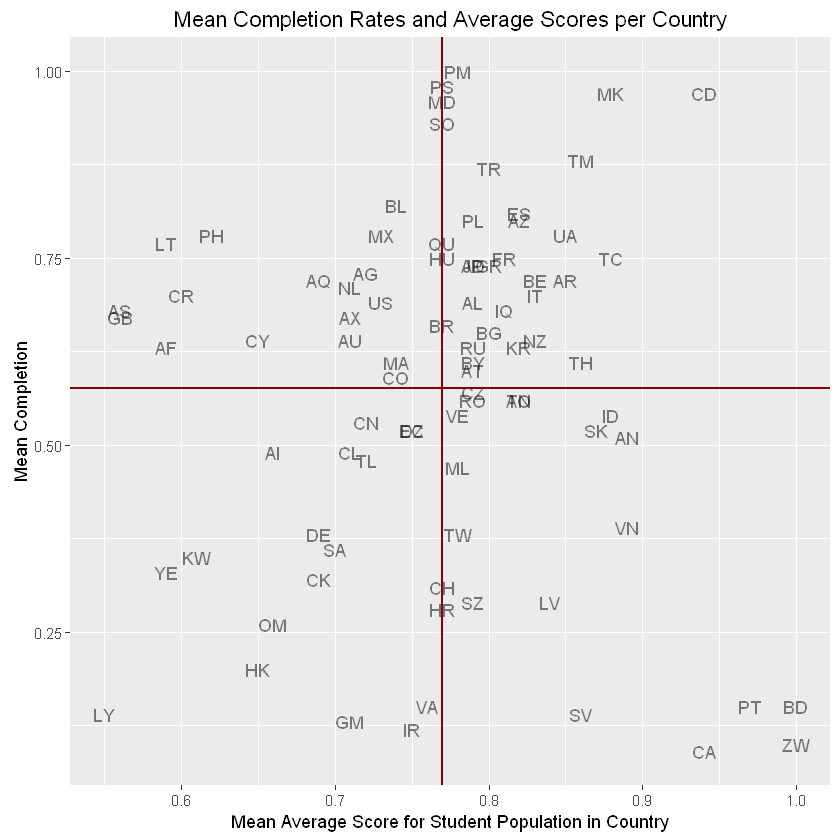

In [123]:
#calculates and plots mean completion rates and average scores per country

countryData=df[,.(mean_avg_score=round(mean(avg_score, na.rm=TRUE),2), mean_completion=round(mean(completion),2)),by=country]
ggplot(countryData, aes(x=mean_avg_score,y=mean_completion, label=country))+geom_text(alpha=0.5)+
scale_y_continuous(name = "Mean Completion")+scale_x_continuous(name = "Mean Average Score for Student Population in Country")+ ggtitle("Mean Completion Rates and Average Scores per Country")+geom_vline(xintercept=countryData[,mean(mean_avg_score, na.rm=TRUE),],size=0.6,colour='darkred')+geom_hline(yintercept=countryData[,mean(mean_completion, na.rm=TRUE),],size=0.6,colour='darkred')

In [131]:
#calculates the mean completion rate for the population

df[,.(median_completion=median(completion), median_score=median(avg_score, na.rm=TRUE)),by=in_course]

,in_course,median_completion,median_score
1,t,1,0.843
2,f,0.85,0.797


In [70]:
#calculates the mean average score by unit

df[,mean(avg_score, na.rm=TRUE),by=unit]

,unit,V1
1,1,0.8005
2,3,0.777068112213647
3,REVIEW 2,0.825905147635223
4,5,0.783038926799007
5,2,0.783358567885258
6,REVIEW 1,0.835300648748841
7,VIDEO PODCASTS,0.784292545292545
8,8,0.774483243690525
9,7,0.801148301886792
10,REVIEW 3,0.843937945492662


In [71]:
#calculates the mean completion rate by unit

df[,mean(completion, na.rm=TRUE),by=unit]

,unit,V1
1,1,0.789435942282466
2,3,0.824059414430969
3,REVIEW 2,0.924835380193363
4,5,0.797000465260546
5,2,0.831994392321794
6,REVIEW 1,0.887510101946247
7,VIDEO PODCASTS,0.51667032967033
8,8,0.794280099296649
9,7,0.835599622641509
10,REVIEW 3,0.924361006289308


In [147]:
#calculates the mean and median inv rate by unit

df[,.(mean=round(mean(inv_rate),3), median=median(inv_rate)),by=unit]

,unit,mean,median
1,1,0.042,0
2,3,0.045,0
3,REVIEW 2,0.042,0
4,5,0.049,0
5,2,0.05,0
6,REVIEW 1,0.031,0
7,VIDEO PODCASTS,0.042,0
8,8,0.043,0
9,7,0.046,0
10,REVIEW 3,0.04,0


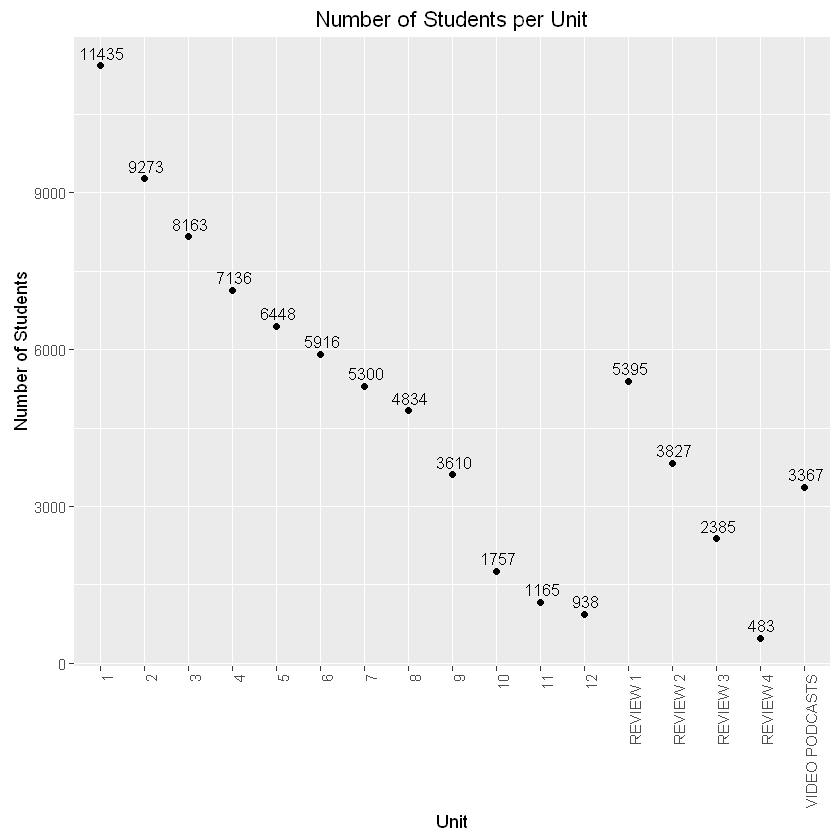

In [186]:
#plots the number of students that are active in a given unit

ggplot(as.data.frame(table(df$unit)), aes(x=Var1,y=Freq,label=Freq))+geom_point()+ geom_text(vjust = -0.5, nudge_x = 0.05, size=3.5)+scale_y_continuous(name = "Number of Students")+scale_x_discrete(name = "Unit")+ggtitle("Number of Students per Unit")+theme(axis.text.x=element_text(angle=90, hjust=1))

In [191]:
#calculates the number of students that have completed a given unit

table(df[completion==1, unit])


             1              2              3              4              5 
          6133           5435           4374           4332             22 
             6              7              8              9             10 
          3605           3239             22           2088            688 
            11             12       REVIEW 1       REVIEW 2       REVIEW 3 
           369            259           3958           3094           1923 
      REVIEW 4 VIDEO PODCASTS 
           268            127 

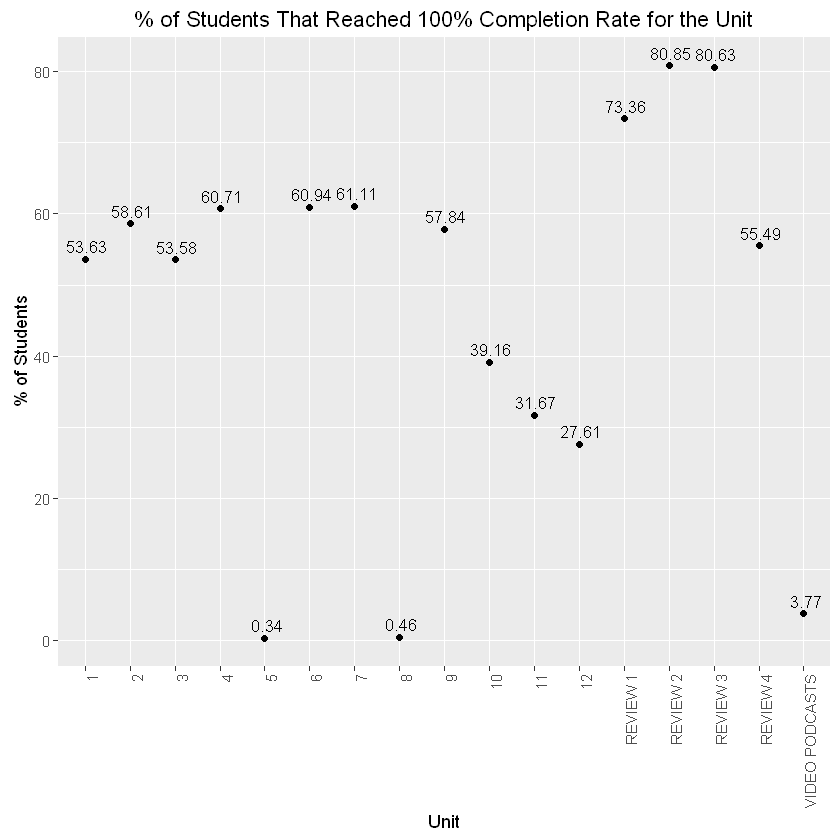

In [137]:
#plots the % of students that have completed a given unit

ggplot(as.data.frame(round(table(df[completion==1, unit])/table(df$unit),4)*100), aes(x=Var1,y=Freq,label=Freq))+geom_point()+ geom_text(vjust = -0.5, nudge_x = 0.05, size=3.5)+scale_y_continuous(name = "% of Students")+scale_x_discrete(name = "Unit")+ggtitle("% of Students That Reached 100% Completion Rate for the Unit")+theme(axis.text.x=element_text(angle=90, hjust=1))

In [198]:
#calculates the % of students that have completed a given unit

round(table(df[completion==1, unit])/table(df$unit),4)*100


             1              2              3              4              5 
         53.63          58.61          53.58          60.71           0.34 
             6              7              8              9             10 
         60.94          61.11           0.46          57.84          39.16 
            11             12       REVIEW 1       REVIEW 2       REVIEW 3 
         31.67          27.61          73.36          80.85          80.63 
      REVIEW 4 VIDEO PODCASTS 
         55.49           3.77 

Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"Warning message in Ops.factor(left, right):
"'/' not meaningful for factors"

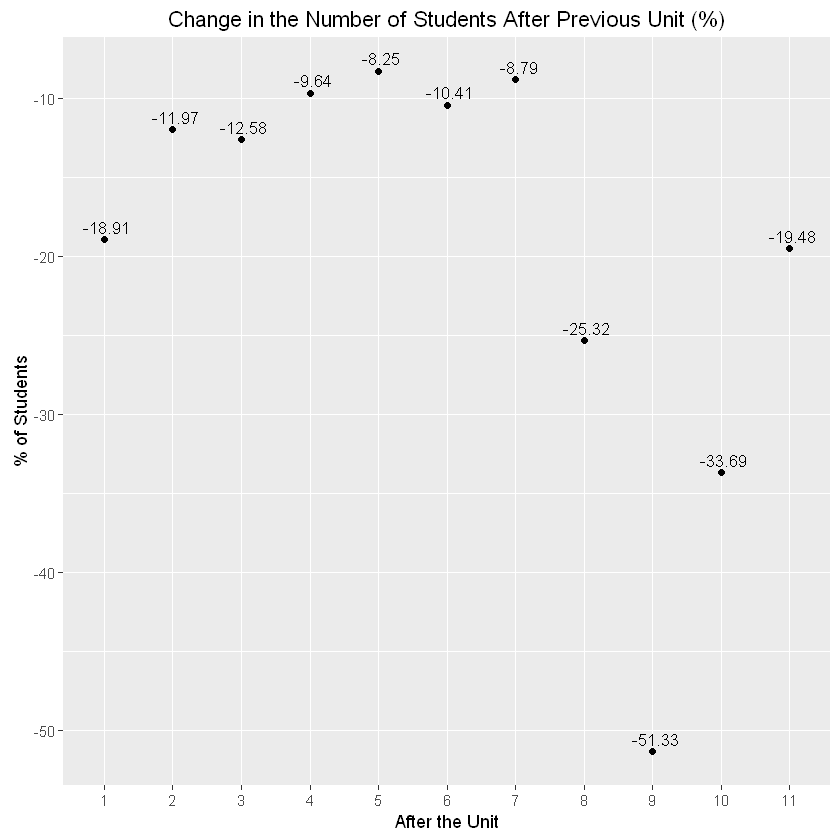

In [127]:
#calculates and plots number of lost students vs previous unit

freq<-data.frame(table(df$unit))
names(freq)<-c('unit', 'student_count')
freq<-freq[1:12,]
drop_down_rate<-(tail(freq, -1) - head(freq, -1))/head(freq,-1)
drop_down_rate<-drop_down_rate[,2]
ggplot(as.data.frame(cbind(Drop_Rate=round(drop_down_rate,4)*100,Unit=c(1:11))), aes(x=as.factor(Unit), y=Drop_Rate, label=Drop_Rate))+geom_point()+geom_text(vjust = -0.5, nudge_x = 0.05, size=3.5)+scale_y_continuous(name = "% of Students")+scale_x_discrete(name = "After the Unit")+ggtitle("Change in the Number of Students After Previous Unit (%)")

Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"Warning message in Ops.factor(left, right):
"'/' not meaningful for factors"Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"Warning message in Ops.factor(left, right):
"'/' not meaningful for factors"

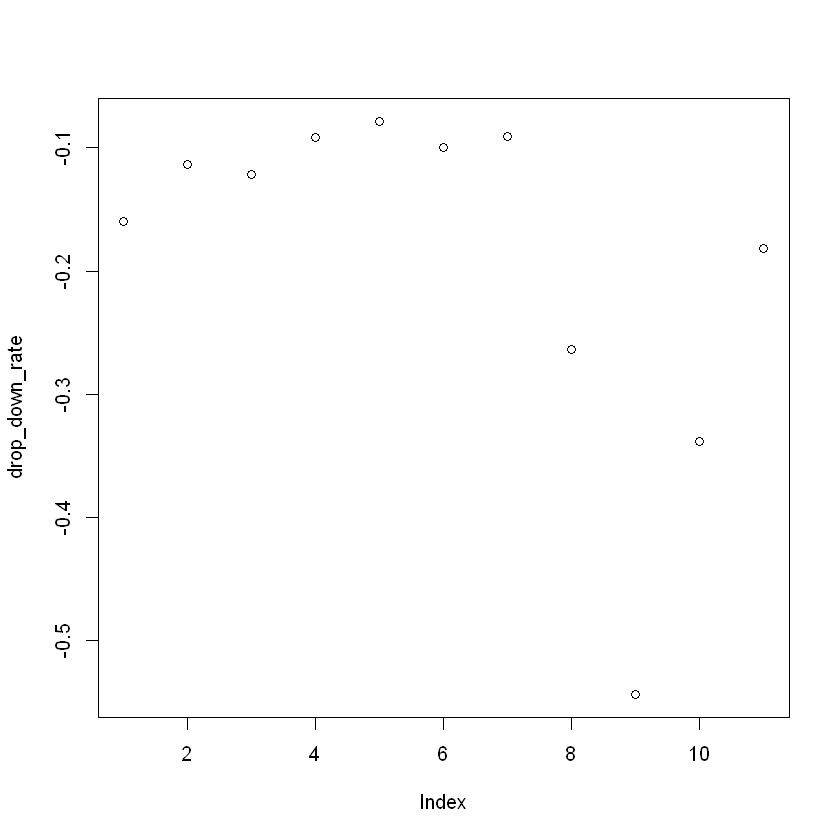

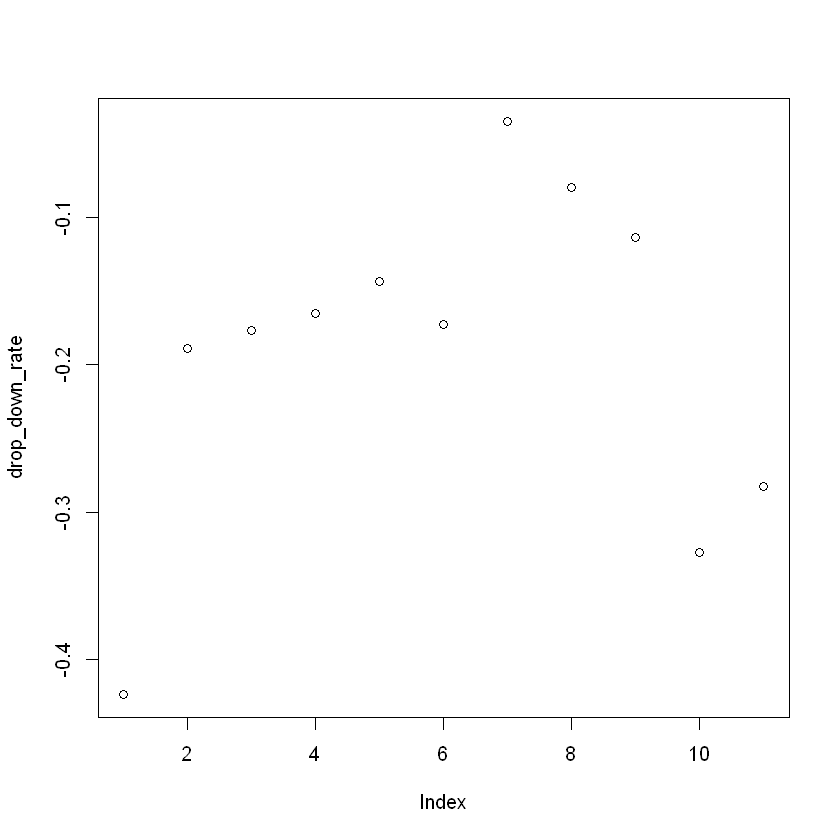

In [122]:
#compares lost students between the course types

teach<-subset(df, in_course=='t')
no_teach<-subset(df, in_course=='f')

freq<-data.frame(table(teach$unit))
names(freq)<-c('unit', 'student_count')
freq<-freq[1:12,]
drop_down_rate<-(tail(freq, -1) - head(freq, -1))/head(freq,-1)
drop_down_rate<-drop_down_rate[,2]
plot(drop_down_rate)

freq<-data.frame(table(no_teach$unit))
names(freq)<-c('unit', 'student_count')
freq<-freq[1:12,]
drop_down_rate<-(tail(freq, -1) - head(freq, -1))/head(freq,-1)
drop_down_rate<-drop_down_rate[,2]
plot(drop_down_rate)

Warning message:
"Removed 2 rows containing missing values (geom_point)."

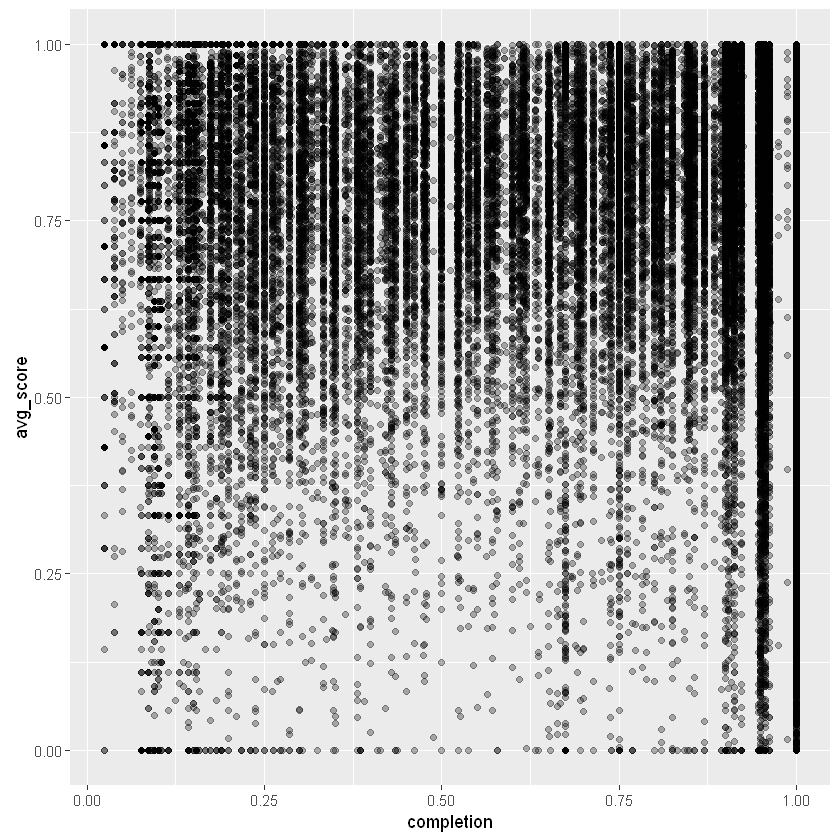

In [8]:
#checks how the average score works

ggplot(df,aes(x=completion,y=avg_score))+geom_point(alpha=0.3)

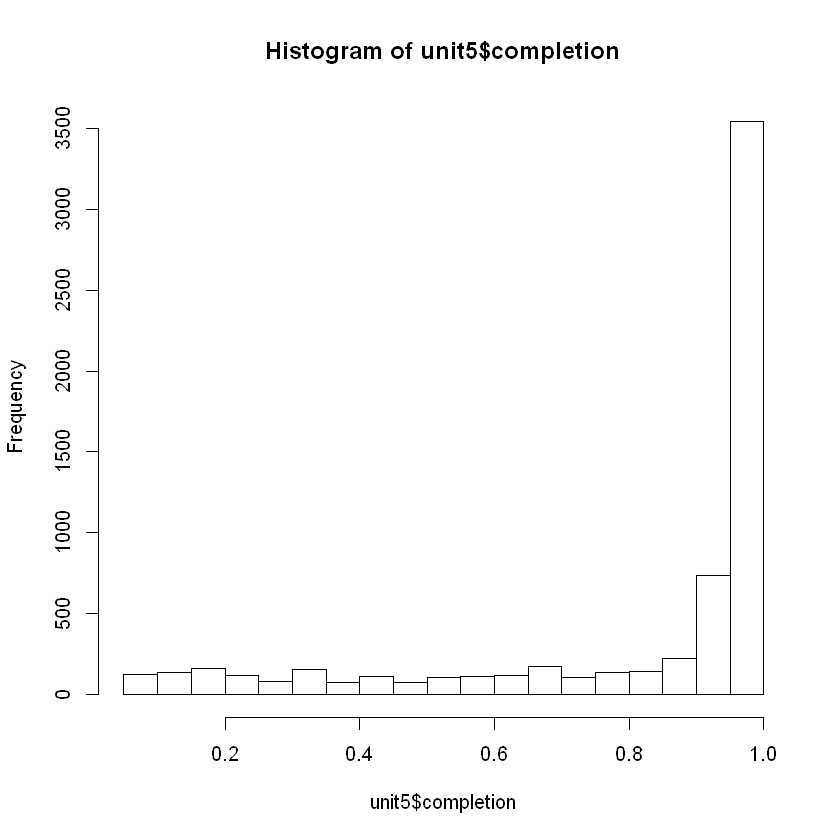

In [124]:
#investigates completion of chapter 5

unit5<-subset(df, unit=='5')
hist(unit5$completion)